## G2M insight for Cab Investment firm ( Must for all Specialization) 

The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

Project delivery:

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights. 

Data Set:

You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

You should fully investigate and understand each data set.

    Review the Source Documentation
    Understand the field names and data types
    Identify relationships across the files
    Field/feature transformations
    Determine which files should be joined versus which ones should be appended
    Create master data and explain the relationship
    Identify and remove duplicates
    Perform other analysis like NA value and outlier detection


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv("/home/equipo/Documents/Job/courses/DataGlacier/DataSets/Cab_Data.csv")

In [3]:
df2 = pd.read_csv("/home/equipo/Documents/Job/courses/DataGlacier/DataSets/City.csv")

In [4]:
df3 = pd.read_csv("/home/equipo/Documents/Job/courses/DataGlacier/DataSets/Transaction_ID.csv")

In [5]:
df4 = pd.read_csv("/home/equipo/Documents/Job/courses/DataGlacier/DataSets/Customer_ID.csv")

In [6]:
df5 = pd.read_csv("/home/equipo/Documents/Job/courses/DataGlacier/DataSets/US Holiday Dates (2004-2021).csv")

In [7]:
df1.shape


(359392, 7)

In [8]:
df2.shape

(20, 3)

In [9]:
df3.shape


(440098, 3)

In [10]:
df4.shape

(49171, 4)

In [11]:
df5.shape

(342, 6)

In [12]:
df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [13]:
df2.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [14]:
df3.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [15]:
df4.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [16]:
df4.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [17]:
df5.head()

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008


## Create master data

In [18]:
# Assume df1, df2, df3 are your three DataFrames
# And they all share a common column, e.g., 'ID'

merged_df = pd.merge(df1, df2, on='City', how='inner')      # First merge
#merged_df = pd.merge(merged_df, df3, on='ID', how='inner')  # Second merge
merged_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


In [19]:
merged_df = pd.merge(merged_df, df3, on='Transaction ID', how='inner')  # Second merge

In [20]:
merged_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Card


In [21]:
merged_df = pd.merge(merged_df, df4, on='Customer ID', how='inner')  # Second merge

In [22]:
merged_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Card,Male,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Card,Male,27,9237
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Cash,Male,53,11242
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Cash,Male,23,23327
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Card,Male,33,8536


##  Check for duplicates based on all columns

In [23]:

duplicates = merged_df.duplicated() #Mark duplicates as True except for the first occurrence.
print("Duplicates based on all columns:\n", duplicates)

Duplicates based on all columns:
 0         False
1         False
2         False
3         False
4         False
          ...  
359387    False
359388    False
359389    False
359390    False
359391    False
Length: 359392, dtype: bool


## There are no duplicates column.

In [24]:
#merged_df.drop_duplicates()

In [25]:
merged_df.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Population', 'Users', 'Customer ID',
       'Payment_Mode', 'Gender', 'Age', 'Income (USD/Month)'],
      dtype='object')

## Perform other analysis like NA value and outlier detection

In [26]:
merged_df.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [27]:
merged_df.isna().any().sum()

0

In [28]:
master_data = merged_df

In [29]:
master_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000


In [30]:
master_data.dtypes

Transaction ID          int64
Date of Travel          int64
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Population             object
Users                  object
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
dtype: object

In [31]:
print(master_data.nunique().sort_values(ascending=False))

Transaction ID        359392
Price Charged          99176
Customer ID            46148
Income (USD/Month)     22725
Cost of Trip           16291
Date of Travel          1095
KM Travelled             874
Age                       48
City                      19
Population                19
Users                     19
Company                    2
Payment_Mode               2
Gender                     2
dtype: int64


In [32]:
master_data['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

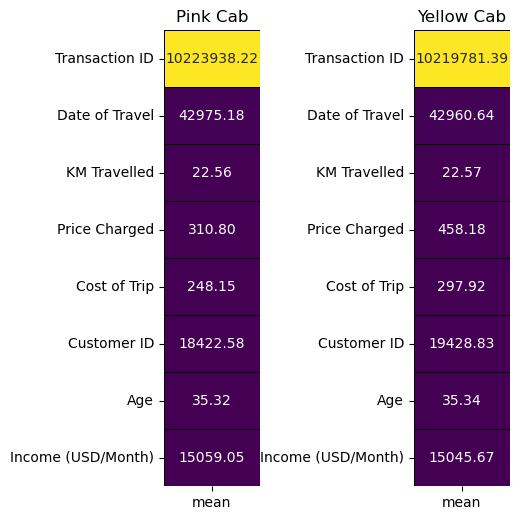

In [33]:
Pink = master_data[master_data['Company'] == 'Pink Cab'].describe().T
Yellow = master_data[master_data['Company'] == 'Yellow Cab'].describe().T
colors = ['#F93822','#FDD20E']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(Pink[['mean']],annot = True,cmap = 'viridis',linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Pink Cab');

plt.subplot(1,2,2)
sns.heatmap(Yellow[['mean']],annot = True,cmap = 'viridis',linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Yellow Cab');

fig.tight_layout(pad = 0)


## Exploratory Data Analysis

Selects all columns in the DataFrame that are of type 'object' — usually string columns.

These are typically the columns that contain categorical text data.

Fits the LabelEncoder to the column's unique string values.

Transforms them into integer codes.

Overwrites the column with these new encoded values.

In [34]:
from sklearn.preprocessing import LabelEncoder


In [35]:
col = list(master_data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(master_data[i].unique()) > 20:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)


Categorical Features : Company City Population Users Payment_Mode Gender
Numerical Features : Transaction ID Date of Travel KM Travelled Price Charged Cost of Trip Customer ID Age Income (USD/Month)


In [36]:
data_encoded = master_data.copy(deep=True)

In [37]:
for col in data_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    

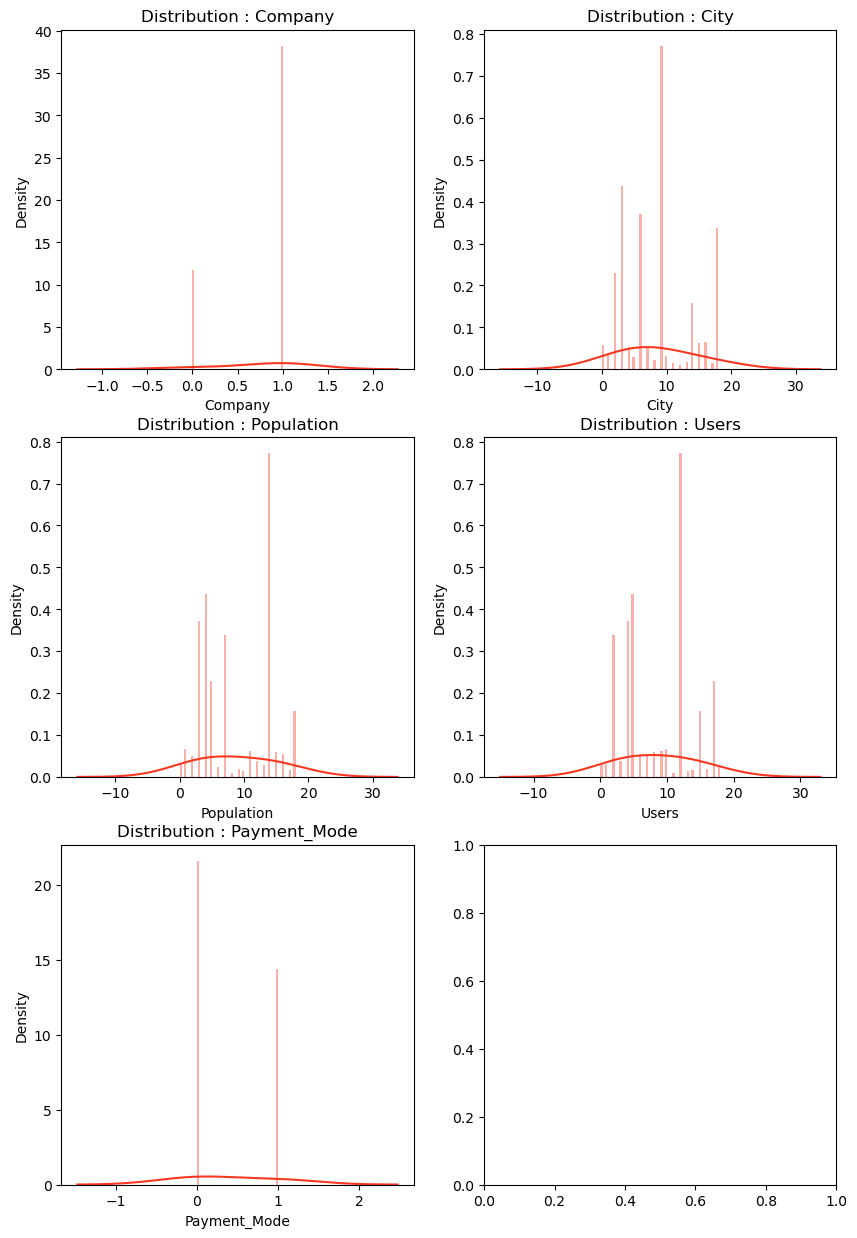

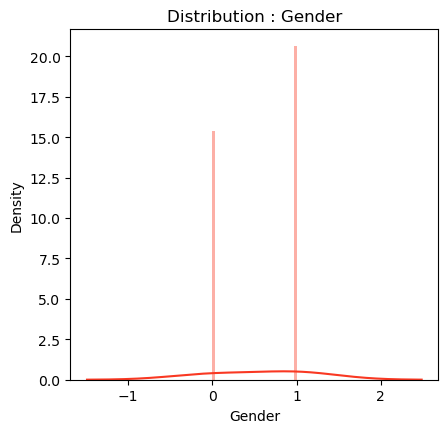

In [38]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features) - 1):
    
    plt.subplot(3,2,i+1)
    sns.distplot(data_encoded[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)
    
plt.figure(figsize = (4.75,4.55))
sns.distplot(data_encoded[categorical_features[len(categorical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + categorical_features[len(categorical_features) - 1]
plt.title(title);


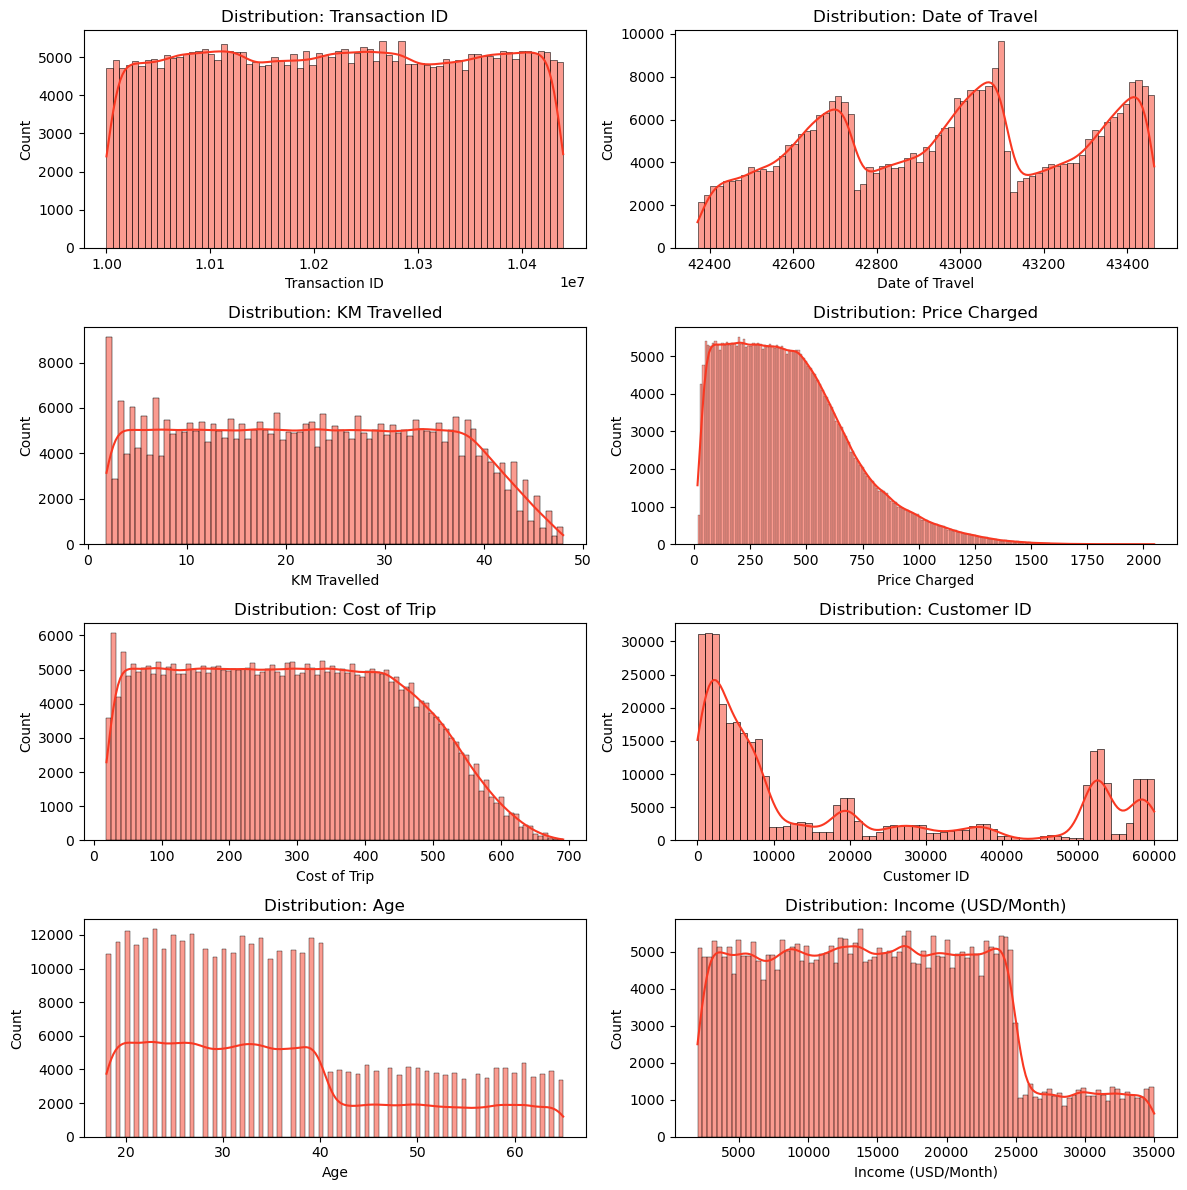

In [39]:
# Total numerical features
num_features = len(numerical_features)

# Define grid size
rows = math.ceil(num_features / 2)
cols = 2

# Set up the figure
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12, rows * 3))
axes = axes.flatten()  # Flatten in case of multiple rows

for i, feature in enumerate(numerical_features):
    #sns.distplot(data_encoded[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},c
    sns.histplot(data_encoded[feature], color=colors[0], ax=axes[i], kde=True)
    #sns.distplot(data_encoded[categorical_features[len(categorical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
    axes[i].set_title(f'Distribution: {feature}')

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


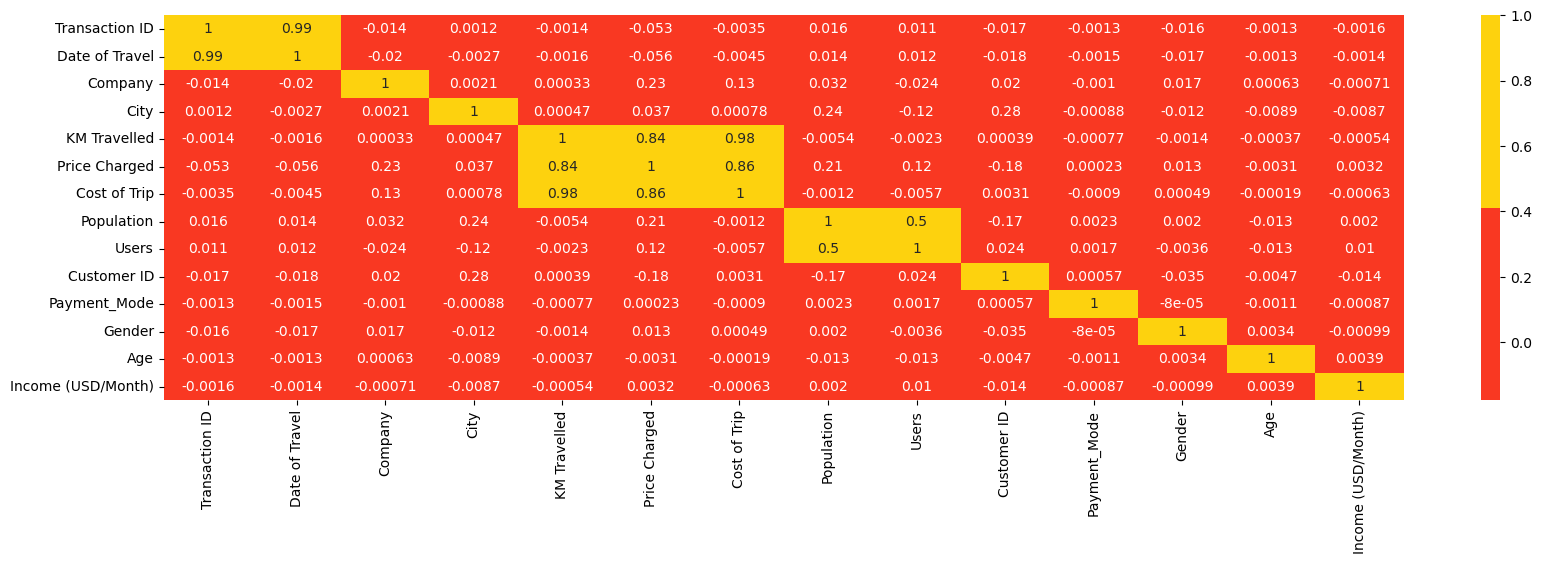

In [40]:
plt.figure(figsize = (20,5))
sns.heatmap(data_encoded.corr(),cmap = colors,annot = True);


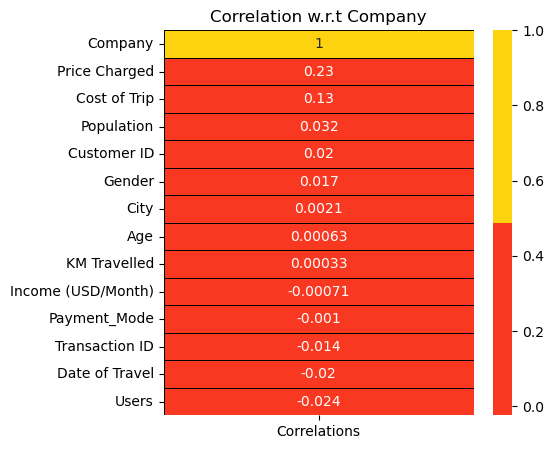

In [41]:
corr = data_encoded.corrwith(data_encoded['Company']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Company');


Create multiple hypothesis and investigate:

You will need to generate 5-7 hypothesis initially to investigate as some will not prove what you are expecting.

For Example: “Is there any seasonality in number of customers using the cab service?”

Areas to investigate:

    Which company has maximum cab users at a particular time period?
    Does margin proportionally increase with increase in number of customers?
    What are the attributes of these customer segments?


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ' 24,701 '),
  Text(1, 0, ' 14,978 '),
  Text(2, 0, ' 80,021 '),
  Text(3, 0, ' 164,468 '),
  Text(4, 0, ' 22,157 '),
  Text(5, 0, ' 12,421 '),
  Text(6, 0, ' 144,132 '),
  Text(7, 0, ' 17,675 '),
  Text(8, 0, ' 9,270 '),
  Text(9, 0, ' 302,149 '),
  Text(10, 0, ' 12,994 '),
  Text(11, 0, ' 6,133 '),
  Text(12, 0, ' 3,643 '),
  Text(13, 0, ' 7,044 '),
  Text(14, 0, ' 69,995 '),
  Text(15, 0, ' 25,063 '),
  Text(16, 0, ' 27,247 '),
  Text(17, 0, ' 5,712 '),
  Text(18, 0, ' 127,001 ')])

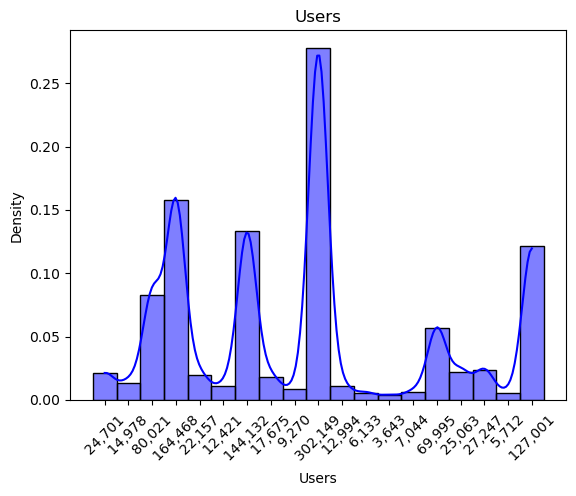

In [42]:
sns.histplot(merged_df["Users"], color='blue', kde=True, bins=20, stat='density')
plt.title('Users')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'ATLANTA GA'),
  Text(1, 0, 'AUSTIN TX'),
  Text(2, 0, 'BOSTON MA'),
  Text(3, 0, 'CHICAGO IL'),
  Text(4, 0, 'DALLAS TX'),
  Text(5, 0, 'DENVER CO'),
  Text(6, 0, 'LOS ANGELES CA'),
  Text(7, 0, 'MIAMI FL'),
  Text(8, 0, 'NASHVILLE TN'),
  Text(9, 0, 'NEW YORK NY'),
  Text(10, 0, 'ORANGE COUNTY'),
  Text(11, 0, 'PHOENIX AZ'),
  Text(12, 0, 'PITTSBURGH PA'),
  Text(13, 0, 'SACRAMENTO CA'),
  Text(14, 0, 'SAN DIEGO CA'),
  Text(15, 0, 'SEATTLE WA'),
  Text(16, 0, 'SILICON VALLEY'),
  Text(17, 0, 'TUCSON AZ'),
  Text(18, 0, 'WASHINGTON DC')])

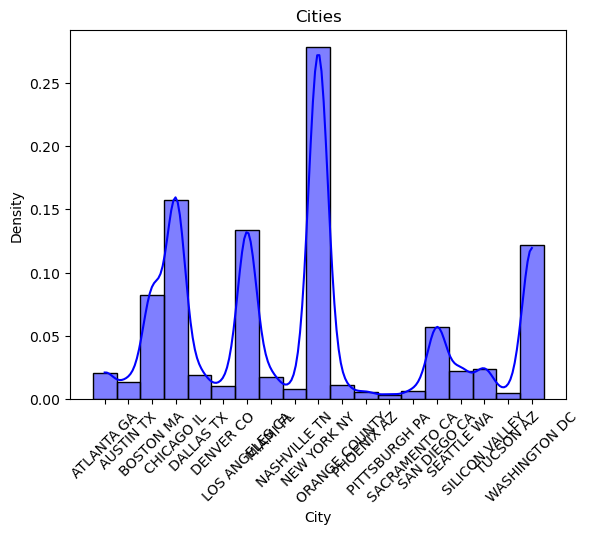

In [43]:
sns.histplot(merged_df["City"], color='blue', kde=True, bins=20, stat='density')
plt.title('Cities')
plt.xticks(rotation=45)

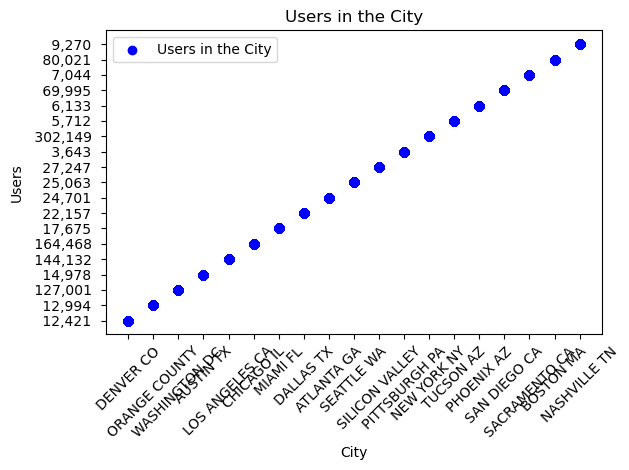

In [44]:
sorted_df = merged_df.sort_values(by='Users')  # or by='Users', ascending=False for reverse order

x = sorted_df["City"]
y = sorted_df["Users"]

plt.scatter(x, y, label='Users in the City', color='blue')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Users')
plt.title('Users in the City')
plt.legend()
plt.tight_layout()  # Avoid label cutoff
plt.show()
